<a href="https://colab.research.google.com/github/muhamadfajarr-hub/coba1/blob/main/Analisis_big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import  seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Semester 7/Analisis big data/anonymisedData

/content/drive/MyDrive/Semester 7/Analisis big data/anonymisedData


**ASSESSMENTS**

In [4]:
d1 = pd.read_csv('assessments.csv')
d1

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [12]:
#Deskripsi statistik dari data
d1.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [14]:
# mengecek apakah data tersebut memiliki null
print(d1.isnull().sum())

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64


In [15]:
#Menghilangkan Missing value pada data Assessment
d1 = d1.dropna()
d1.isna().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

In [16]:
#Mengecek nilai duplikat pada data
d1.duplicated().sum()

0

<Axes: xlabel='weight', ylabel='count'>

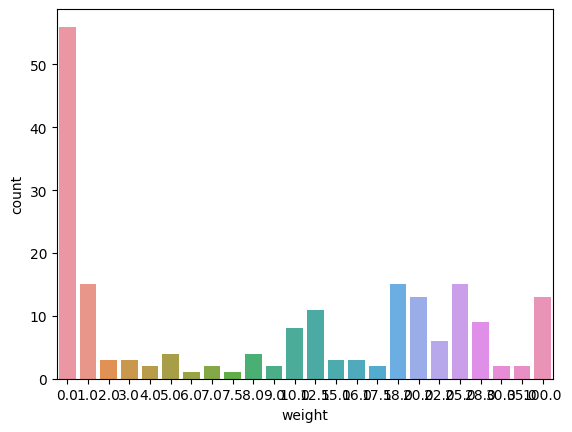

In [18]:
sns.countplot(x=d1['weight'])

In [19]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        195 non-null    object 
 1   code_presentation  195 non-null    object 
 2   id_assessment      195 non-null    int64  
 3   assessment_type    195 non-null    object 
 4   date               195 non-null    float64
 5   weight             195 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 10.7+ KB


In [20]:

for col in d1.columns :
  print(col)
  print(d1[col].unique())
  print("panjang : ",len(d1[col].unique()), "\n")

code_module
['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
panjang :  7 

code_presentation
['2013J' '2014J' '2013B' '2014B']
panjang :  4 

id_assessment
[ 1752  1753  1754  1755  1756  1758  1759  1760  1761  1762 14991 14992
 14993 14994 14995 14984 14985 14986 14987 14988 14989 15003 15004 15005
 15006 15007 14996 14997 14998 14999 15000 15001 15015 15016 15017 15018
 15019 15008 15009 15010 15011 15012 15013 15020 15021 15022 15023 15024
 24286 24287 24288 24289 24282 24283 24284 24285 24295 24296 24297 24298
 24291 24292 24293 24294 25341 25342 25343 25344 25345 25346 25347 25334
 25335 25336 25337 25338 25339 25340 25348 25349 25350 25351 25352 25353
 25354 25355 25356 25357 25358 25359 25360 25361 25362 25363 25364 25365
 25366 25367 30709 30710 30711 30712 30713 30714 30715 30716 30717 30718
 30719 30720 30721 30722 30723 34865 34866 34867 34868 34869 34871 34870
 34860 34861 34862 34863 34864 34872 34878 34879 34880 34881 34882 34884
 34883 34873 34874 34875 34876 34877 34885 34

**COURSES**

In [5]:
#Membaca data courses
d2 = pd.read_csv('courses.csv')
d2

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [21]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [23]:
#Deskripsi statistik dari data
d2.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


In [24]:
# mengecek apakah data tersebut memiliki null
print(d2.isnull().sum())

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64


In [25]:
#melakukan pengecekan nilai duplikat,apakah data courses memiliki nilai duplikat
#Setelah melakukan pengecekan data tersebut tidak memiliki missing value dan nilai  duplicate
d2.duplicated().sum()

0

In [28]:
for col in d2.columns :
  print(col)
  print(d2[col].unique())
  print("panjang : ",len(d2[col].unique()), "\n")

code_module
['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
panjang :  7 

code_presentation
['2013J' '2014J' '2013B' '2014B']
panjang :  4 

module_presentation_length
[268 269 262 240 234 241 261]
panjang :  7 



<Axes: xlabel='module_presentation_length', ylabel='count'>

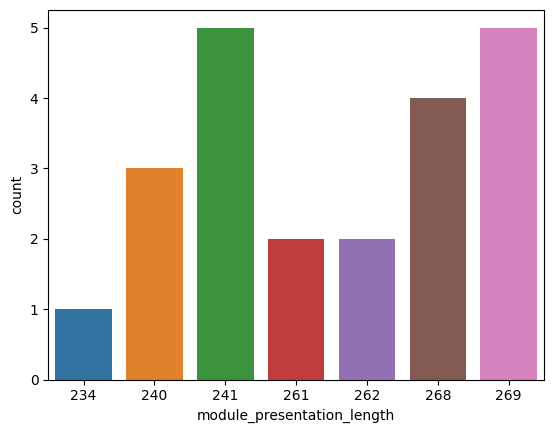

In [26]:
sns.countplot(x=d2['module_presentation_length'])

**STUDENT_ASSESSMENT**

In [6]:
d3 = pd.read_csv('studentAssessment.csv')
d3

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


STUDENT_INFO

In [7]:
d4 = pd.read_csv('studentInfo.csv')
d4

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [8]:
d5 = pd.read_csv('studentRegistration.csv')
d5

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [9]:
d6 = pd.read_csv('studentVle.csv')
d6

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [10]:
d7 = pd.read_csv('vle.csv')
d7

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN
